In [1]:
# dataset is from https://www.kaggle.com/CooperUnion/anime-recommendations-database
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import seaborn as sns
%matplotlib inline


plt.rcParams['figure.figsize'] = (6, 4)
plt.style.use('ggplot')
%config InlineBackend.figure_formats = {'png', 'retina'}

# Data

In [2]:
anime = pd.read_csv('./input/anime.csv')
print(anime.shape)
anime.head()

(12294, 7)


,anime_id,name,genre,type,episodes,rating,members
0,32281,Kimi no Na wa.,"Drama, Romance, School, Supernatural",Movie,1,9.37,200630
1,5114,Fullmetal Alchemist: Brotherhood,"Action, Adventure, Drama, Fantasy, Magic, Mili...",TV,64,9.26,793665
2,28977,Gintama°,"Action, Comedy, Historical, Parody, Samurai, S...",TV,51,9.25,114262
3,9253,Steins;Gate,"Sci-Fi, Thriller",TV,24,9.17,673572
4,9969,Gintama&#039;,"Action, Comedy, Historical, Parody, Samurai, S...",TV,51,9.16,151266


In [3]:
anime.isnull().sum()

anime_id      0
name          0
genre        62
type         25
episodes      0
rating      230
members       0
dtype: int64

In [4]:
user = pd.read_csv('./input/rating.csv')
print(user.shape)
user.head()

(7813737, 3)


,user_id,anime_id,rating
0,1,20,-1
1,1,24,-1
2,1,79,-1
3,1,226,-1
4,1,241,-1


In [5]:
user.isnull().sum()

user_id     0
anime_id    0
rating      0
dtype: int64

Calculate mean rating per user

In [6]:
MRPU = user.groupby(['user_id']).mean().reset_index()
MRPU['mean_rating'] = MRPU['rating']

MRPU.drop(['anime_id','rating'],axis=1, inplace=True)

In [7]:
user = pd.merge(user,MRPU,on=['user_id','user_id'])

In [8]:
user = user.drop(user[user.rating < user.mean_rating].index)

In [9]:
user.head()

,user_id,anime_id,rating,mean_rating
47,1,8074,10,-0.712418
81,1,11617,10,-0.712418
83,1,11757,10,-0.712418
101,1,15451,10,-0.712418
153,2,11771,10,2.666667


In [10]:
user.shape

(4262566, 4)

In [11]:
user = user.rename({'rating':'userRating'}, axis='columns')

Combine two datasets

In [12]:
mergedata = pd.merge(anime,user,on=['anime_id','anime_id'])
mergedata= mergedata[mergedata.user_id <= 20000]
print(mergedata.shape)
mergedata.head(10)

(1131696, 10)


,anime_id,name,genre,type,episodes,rating,members,user_id,userRating,mean_rating
0,32281,Kimi no Na wa.,"Drama, Romance, School, Supernatural",Movie,1,9.37,200630,152,10,7.699301
1,32281,Kimi no Na wa.,"Drama, Romance, School, Supernatural",Movie,1,9.37,200630,244,10,8.729242
2,32281,Kimi no Na wa.,"Drama, Romance, School, Supernatural",Movie,1,9.37,200630,271,10,7.372287
3,32281,Kimi no Na wa.,"Drama, Romance, School, Supernatural",Movie,1,9.37,200630,322,10,8.356322
4,32281,Kimi no Na wa.,"Drama, Romance, School, Supernatural",Movie,1,9.37,200630,398,10,-0.832298
5,32281,Kimi no Na wa.,"Drama, Romance, School, Supernatural",Movie,1,9.37,200630,462,8,7.374593
6,32281,Kimi no Na wa.,"Drama, Romance, School, Supernatural",Movie,1,9.37,200630,490,10,8.062500
7,32281,Kimi no Na wa.,"Drama, Romance, School, Supernatural",Movie,1,9.37,200630,548,10,8.112360
8,32281,Kimi no Na wa.,"Drama, Romance, School, Supernatural",Movie,1,9.37,200630,570,10,8.388889
9,32281,Kimi no Na wa.,"Drama, Romance, School, Supernatural",Movie,1,9.37,200630,598,10,8.680328


In [13]:
mergedata = mergedata.dropna(how='any')

In [14]:
mergedata.isnull().sum()

anime_id       0
name           0
genre          0
type           0
episodes       0
rating         0
members        0
user_id        0
userRating     0
mean_rating    0
dtype: int64

In [15]:
print(len(anime['anime_id'].unique()), len(mergedata['anime_id'].unique()))

12294 7845


# Clustering 

prepare for data

In [16]:
user_anime = pd.crosstab(mergedata['user_id'], mergedata['name'])
user_anime.head(10)

name,&quot;Bungaku Shoujo&quot; Kyou no Oyatsu: Hatsukoi,&quot;Bungaku Shoujo&quot; Memoire,&quot;Bungaku Shoujo&quot; Movie,&quot;Eiji&quot;,.hack//G.U. Returner,.hack//G.U. Trilogy,.hack//G.U. Trilogy: Parody Mode,.hack//Gift,.hack//Intermezzo,.hack//Liminality,...,iDOLM@STER Xenoglossia,iDOLM@STER Xenoglossia Specials,lilac (bombs Jun Togawa),makemagic,s.CRY.ed,xxxHOLiC,xxxHOLiC Kei,xxxHOLiC Movie: Manatsu no Yoru no Yume,xxxHOLiC Rou,xxxHOLiC Shunmuki
user_id,,,,,,,,,,,,,,,,,,,,,
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [17]:
user_anime.shape

(20000, 7845)

In [18]:
from sklearn.decomposition import LatentDirichletAllocation
from sklearn.manifold import TSNE
from sklearn.decomposition import TruncatedSVD
from collections import Counter

In [19]:
def get_keys(topic_matrix):
    '''
    returns an integer list of predicted topic 
    categories for a given topic matrix
    '''
    keys = topic_matrix.argmax(axis=1).tolist()
    return keys

def keys_to_counts(keys):
    '''
    returns a tuple of topic categories and their 
    accompanying magnitudes for a given list of keys
    '''
    count_pairs = Counter(keys).items()
    categories = [pair[0] for pair in count_pairs]
    counts = [pair[1] for pair in count_pairs]
    return (categories, counts)

In [20]:
colormap = np.array([
    "#1f77b4", "#aec7e8", "#ff7f0e", "#ffbb78", "#2ca02c",
    "#98df8a", "#d62728", "#ff9896", "#9467bd", "#c5b0d5",
    "#8c564b", "#c49c94", "#e377c2", "#f7b6d2", "#7f7f7f",
    "#c7c7c7", "#bcbd22", "#dbdb8d", "#17becf", "#9edae5" ])
colormap = colormap[:10]

In [21]:
lda_model = LatentDirichletAllocation(n_components=10, learning_method='online', 
                                          random_state=0, verbose=0)
lda_matrix = lda_model.fit_transform(user_anime)

In [22]:
lda_keys = get_keys(lda_matrix)
lda_categories, lda_counts = keys_to_counts(lda_keys)

In [23]:
tsne_lda_model = TSNE(n_components=2, perplexity=50, learning_rate=100, 
                        n_iter=3500, verbose=1, random_state=0, angle=0.75)
tsne_lda_vectors = tsne_lda_model.fit_transform(lda_matrix)

[t-SNE] Computing 151 nearest neighbors...
[t-SNE] Indexed 20000 samples in 0.036s...
[t-SNE] Computed neighbors for 20000 samples in 1.691s...
[t-SNE] Computed conditional probabilities for sample 1000 / 20000
[t-SNE] Computed conditional probabilities for sample 2000 / 20000
[t-SNE] Computed conditional probabilities for sample 3000 / 20000
[t-SNE] Computed conditional probabilities for sample 4000 / 20000
[t-SNE] Computed conditional probabilities for sample 5000 / 20000
[t-SNE] Computed conditional probabilities for sample 6000 / 20000
[t-SNE] Computed conditional probabilities for sample 7000 / 20000
[t-SNE] Computed conditional probabilities for sample 8000 / 20000
[t-SNE] Computed conditional probabilities for sample 9000 / 20000
[t-SNE] Computed conditional probabilities for sample 10000 / 20000
[t-SNE] Computed conditional probabilities for sample 11000 / 20000
[t-SNE] Computed conditional probabilities for sample 12000 / 20000
[t-SNE] Computed conditional probabilities for sa

In [24]:
ps_lda = pd.DataFrame(tsne_lda_vectors)
ps_lda.head()

,0,1
0,-12.346666,-75.214790
1,-3.864156,21.068823
2,1.063617,36.457130
3,-8.659199,-39.415108
4,-22.424561,5.107208


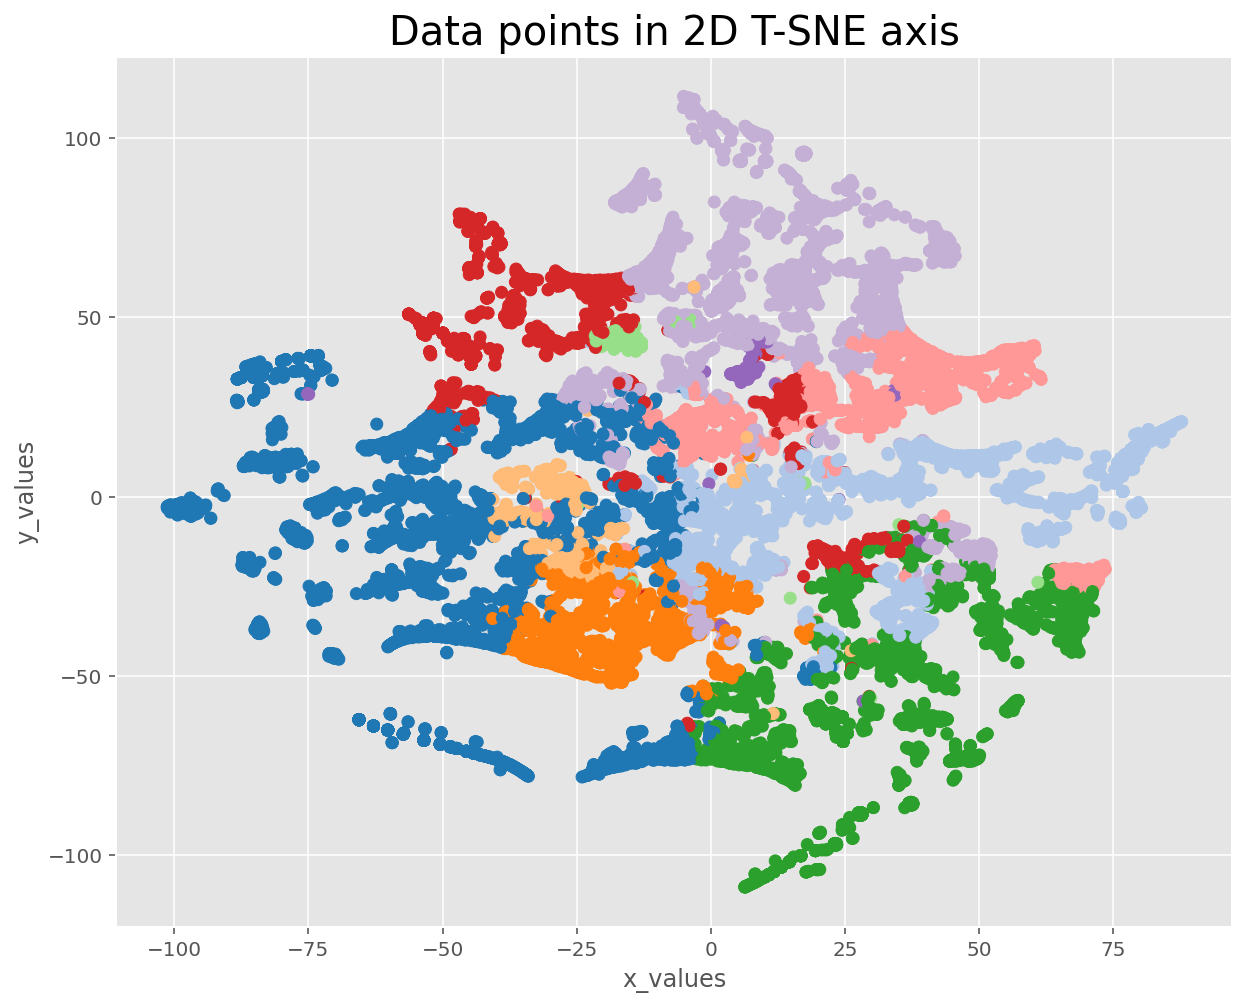

In [25]:
fig = plt.figure(figsize=(10,8))
plt.scatter(ps_lda[1],ps_lda[0],c =colormap[lda_keys])


plt.xlabel('x_values')
plt.ylabel('y_values')

plt.title('Data points in 2D T-SNE axis', fontsize=20)
plt.show()

In [26]:
user_anime['cluster'] = lda_keys
user_anime.head()

name,&quot;Bungaku Shoujo&quot; Kyou no Oyatsu: Hatsukoi,&quot;Bungaku Shoujo&quot; Memoire,&quot;Bungaku Shoujo&quot; Movie,&quot;Eiji&quot;,.hack//G.U. Returner,.hack//G.U. Trilogy,.hack//G.U. Trilogy: Parody Mode,.hack//Gift,.hack//Intermezzo,.hack//Liminality,...,iDOLM@STER Xenoglossia Specials,lilac (bombs Jun Togawa),makemagic,s.CRY.ed,xxxHOLiC,xxxHOLiC Kei,xxxHOLiC Movie: Manatsu no Yoru no Yume,xxxHOLiC Rou,xxxHOLiC Shunmuki,cluster
user_id,,,,,,,,,,,,,,,,,,,,,
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1


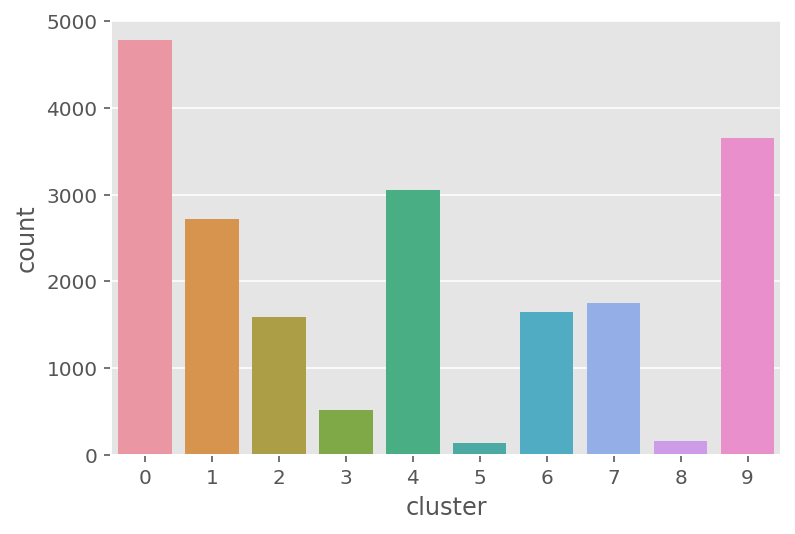

In [27]:
sns.countplot('cluster', data=user_anime)
plt.show()

In [28]:
c = []
for i in range(10):
    c.append(user_anime[user_anime['cluster']==i].drop('cluster',axis=1).mean())
    

In [29]:
#helper functions
def createAnimeInfoList(animelist):
    episode_list = list()
    genre_list = list()
    member_list = list()
    rating_list= list()
    for x in anime['name']:
        if x in animelist:
            episode_list.append(anime[anime['name']==x].episodes.values.astype(int))
            member_list.append(anime[anime['name']==x].members.values.astype(int))
            rating_list.append(anime[anime['name']==x].rating.values.astype(int))
            for y in anime[anime['name']==x].genre.values:
                 genre_list.append(y)
    return genre_list,episode_list,rating_list,member_list

def count_word(df, ref_col, liste):
    keyword_count = dict()
    for s in liste: keyword_count[s] = 0
    for liste_keywords in df[ref_col].str.split(','):        
        if type(liste_keywords) == float and pd.isnull(liste_keywords): continue        
        for s in [s for s in liste_keywords if s in liste]: 
            if pd.notnull(s): keyword_count[s] += 1
    #______________________________________________________________________
    # convert the dictionary in a list to sort the keywords by frequency
    keyword_occurences = []
    for k,v in keyword_count.items():
        keyword_occurences.append([k,v])
    keyword_occurences.sort(key = lambda x:x[1], reverse = True)
    return keyword_occurences, keyword_count

from wordcloud import WordCloud

def makeCloud(Dict,name,color):
    words = dict()

    for s in Dict:
        words[s[0]] = s[1]

        wordcloud = WordCloud(
                      width=1500,
                      height=500, 
                      background_color=color, 
                      max_words=20,
                      max_font_size=500, 
                      normalize_plurals=False)
        wordcloud.generate_from_frequencies(words)


    fig = plt.figure(figsize=(12, 8))
    plt.title(name)
    plt.imshow(wordcloud)
    plt.axis('off')

    plt.show()


Cluster0

In [30]:
print("Top 10 anime which will explain characteristic of {} cluster".format(0))
c[0].sort_values(ascending=False)[0:10]

Top 10 anime which will explain characteristic of 0 cluster


name
Sword Art Online                    0.500105
Angel Beats!                        0.453651
Shingeki no Kyojin                  0.432517
Death Note                          0.398200
Mirai Nikki (TV)                    0.371417
Toradora!                           0.318477
Code Geass: Hangyaku no Lelouch     0.315547
Steins;Gate                         0.306759
Fullmetal Alchemist: Brotherhood    0.299226
Clannad: After Story                0.295250
dtype: float64

In [31]:
animelist = list(c[0].index)
data = pd.DataFrame()
data['genre'],data['episode'],data['rating'],data['member'] =  createAnimeInfoList(animelist)
set_keywords = set()
for liste_keywords in data['genre'].str.split(',').values:
    if isinstance(liste_keywords, float): continue  # only happen if liste_keywords = NaN
    set_keywords = set_keywords.union(liste_keywords)


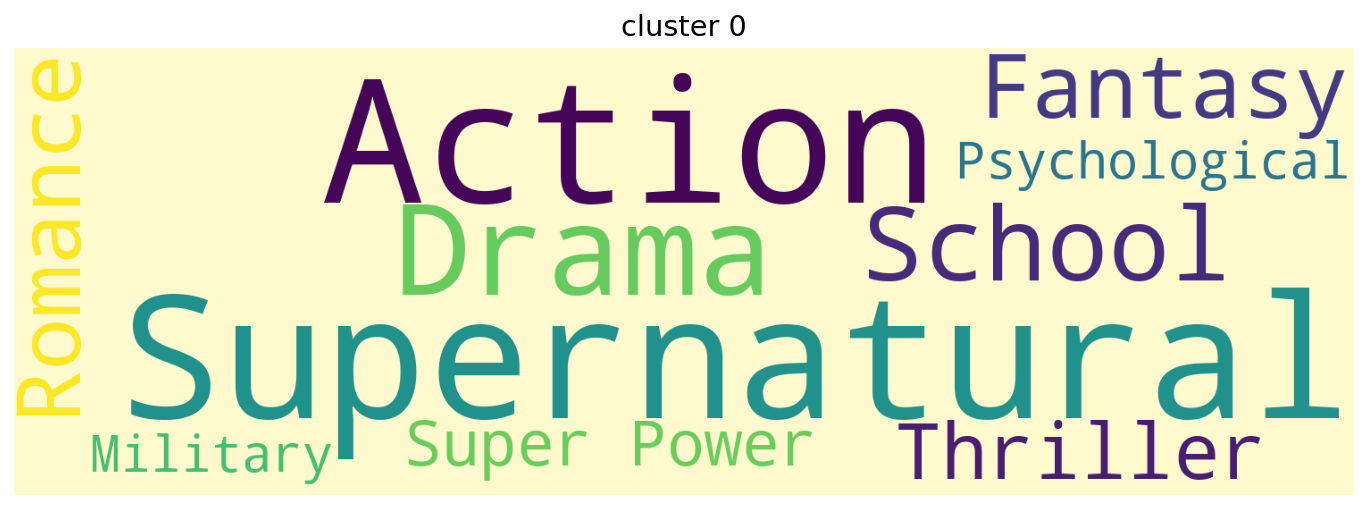

In [32]:

c0_animelist = list(c[0].sort_values(ascending=False)[0:15].index)
c0_data = pd.DataFrame()
c0_data['genre'],c0_data['episode'],c0_data['rating'],c0_data['member'] =  createAnimeInfoList(c0_animelist)
c0_data.iloc[:,1:4] = c0_data.iloc[:,1:4].astype(int) # change to numeric object to integer
keyword_occurences, dum = count_word(c0_data, 'genre', set_keywords)
makeCloud(keyword_occurences[0:10],"cluster 0","lemonchiffon")

In [33]:
print('cluster 0\nAVG episode : {0}\nAVG movie rating : {1}\nAVG member : {2}'
      .format(c0_data['episode'].mean(), c0_data['rating'].mean(),c0_data['member'].mean()))
keyword_occurences[0:5]

cluster 0
AVG episode : 24.866666666666667
AVG movie rating : 8.0
AVG member : 690081.5333333333


[[' Supernatural', 8],
 ['Action', 8],
 [' Drama', 6],
 [' School', 5],
 [' Fantasy', 5]]

Cluster 1

In [34]:
print("Top 10 anime which will explain characteristic of {} cluster".format(0))
c[1].sort_values(ascending=False)[0:10]

Top 10 anime which will explain characteristic of 0 cluster


name
Shingeki no Kyojin                    0.596916
Fullmetal Alchemist: Brotherhood      0.537078
Death Note                            0.531938
Code Geass: Hangyaku no Lelouch       0.408957
One Punch Man                         0.408223
Steins;Gate                           0.399046
Code Geass: Hangyaku no Lelouch R2    0.396476
Hunter x Hunter (2011)                0.379956
Sword Art Online                      0.360132
No Game No Life                       0.354626
dtype: float64

In [35]:
animelist = list(c[1].index)
data = pd.DataFrame()
data['genre'],data['episode'],data['rating'],data['member'] =  createAnimeInfoList(animelist)
set_keywords = set()
for liste_keywords in data['genre'].str.split(',').values:
    if isinstance(liste_keywords, float): continue  # only happen if liste_keywords = NaN
    set_keywords = set_keywords.union(liste_keywords)

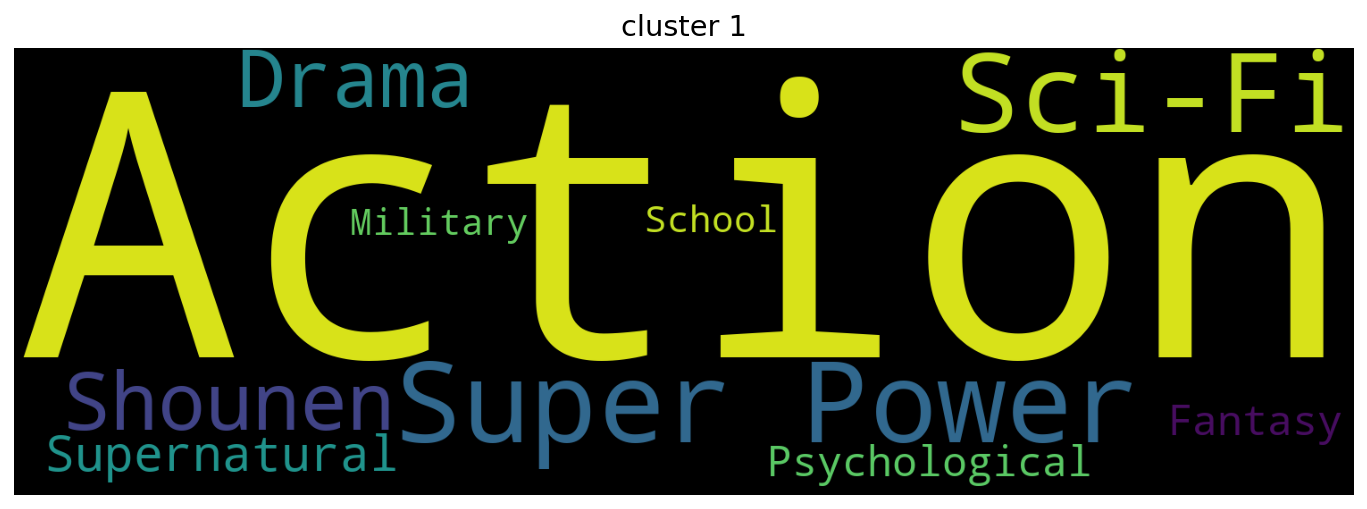

In [36]:
from wordcloud import WordCloud
c1_animelist = list(c[1].sort_values(ascending=False)[0:15].index)
c1_data = pd.DataFrame()
c1_data['genre'],c1_data['episode'],c1_data['rating'],c1_data['member'] =  createAnimeInfoList(c1_animelist)
c1_data.iloc[:,1:4] = c1_data.iloc[:,1:4].astype(int) # change to numeric object to integer
keyword_occurences, dum = count_word(c1_data, 'genre', set_keywords)
makeCloud(keyword_occurences[0:10],"cluster 1","black")

In [37]:
print('cluster 0\nAVG episode : {0}\nAVG movie rating : {1}\nAVG member : {2}'
      .format(c1_data['episode'].mean(), c1_data['rating'].mean(),c1_data['member'].mean()))
keyword_occurences[0:5]

cluster 0
AVG episode : 33.666666666666664
AVG movie rating : 8.133333333333333
AVG member : 618225.8666666667


[['Action', 10],
 [' Super Power', 5],
 [' Sci-Fi', 5],
 [' Shounen', 5],
 [' Drama', 5]]

# Merge data

In [38]:
cluster_df = pd.DataFrame()
cluster_df["cluster"] = user_anime["cluster"]
cluster_df["user_id"] = user_anime.index

cluster_df.head()

,cluster,user_id
1,0,1
2,1,2
3,1,3
4,0,4
5,1,5


In [39]:
mergedata = pd.merge(mergedata, cluster_df,on=['user_id','user_id'])
print(mergedata.shape)
mergedata.head(10)

(1131688, 11)


,anime_id,name,genre,type,episodes,rating,members,user_id,userRating,mean_rating,cluster
0,32281,Kimi no Na wa.,"Drama, Romance, School, Supernatural",Movie,1,9.37,200630,152,10,7.699301,9
1,5114,Fullmetal Alchemist: Brotherhood,"Action, Adventure, Drama, Fantasy, Magic, Mili...",TV,64,9.26,793665,152,9,7.699301,9
2,9253,Steins;Gate,"Sci-Fi, Thriller",TV,24,9.17,673572,152,9,7.699301,9
3,4181,Clannad: After Story,"Drama, Fantasy, Romance, Slice of Life, Supern...",TV,24,9.06,456749,152,9,7.699301,9
4,2904,Code Geass: Hangyaku no Lelouch R2,"Action, Drama, Mecha, Military, Sci-Fi, Super ...",TV,25,8.98,572888,152,8,7.699301,9
5,199,Sen to Chihiro no Kamikakushi,"Adventure, Drama, Supernatural",Movie,1,8.93,466254,152,10,7.699301,9
6,12355,Ookami Kodomo no Ame to Yuki,"Fantasy, Slice of Life",Movie,1,8.84,226193,152,10,7.699301,9
7,1575,Code Geass: Hangyaku no Lelouch,"Action, Mecha, Military, School, Sci-Fi, Super...",TV,25,8.83,715151,152,8,7.699301,9
8,1,Cowboy Bebop,"Action, Adventure, Comedy, Drama, Sci-Fi, Space",TV,26,8.82,486824,152,10,7.699301,9
9,164,Mononoke Hime,"Action, Adventure, Fantasy",Movie,1,8.81,339556,152,9,7.699301,9


# EDA

In [40]:
mergedata.dtypes

anime_id         int64
name            object
genre           object
type            object
episodes        object
rating         float64
members          int64
user_id          int64
userRating       int64
mean_rating    float64
cluster          int64
dtype: object

In [41]:
top_anime = mergedata["name"].value_counts().sort_values(ascending=False)[:10]
top_anime_df=pd.DataFrame(top_anime)
top_anime_df.reset_index(inplace=True)
top_anime_df.rename(columns={'index':'name', 'name':'A_Count'}, inplace=True)
top_anime_df

,name,A_Count
0,Death Note,8345
1,Shingeki no Kyojin,6893
2,Code Geass: Hangyaku no Lelouch,6093
3,Fullmetal Alchemist: Brotherhood,5869
4,Sword Art Online,5832
5,Code Geass: Hangyaku no Lelouch R2,5508
6,Angel Beats!,5495
7,Toradora!,4920
8,Steins;Gate,4741
9,Fullmetal Alchemist,4664


[Text(0, 0, 'Death Note'),
 Text(0, 0, 'Shingeki no Kyojin'),
 Text(0, 0, 'Code Geass: Hangyaku no Lelouch'),
 Text(0, 0, 'Fullmetal Alchemist: Brotherhood'),
 Text(0, 0, 'Sword Art Online'),
 Text(0, 0, 'Code Geass: Hangyaku no Lelouch R2'),
 Text(0, 0, 'Angel Beats!'),
 Text(0, 0, 'Toradora!'),
 Text(0, 0, 'Steins;Gate'),
 Text(0, 0, 'Fullmetal Alchemist')]

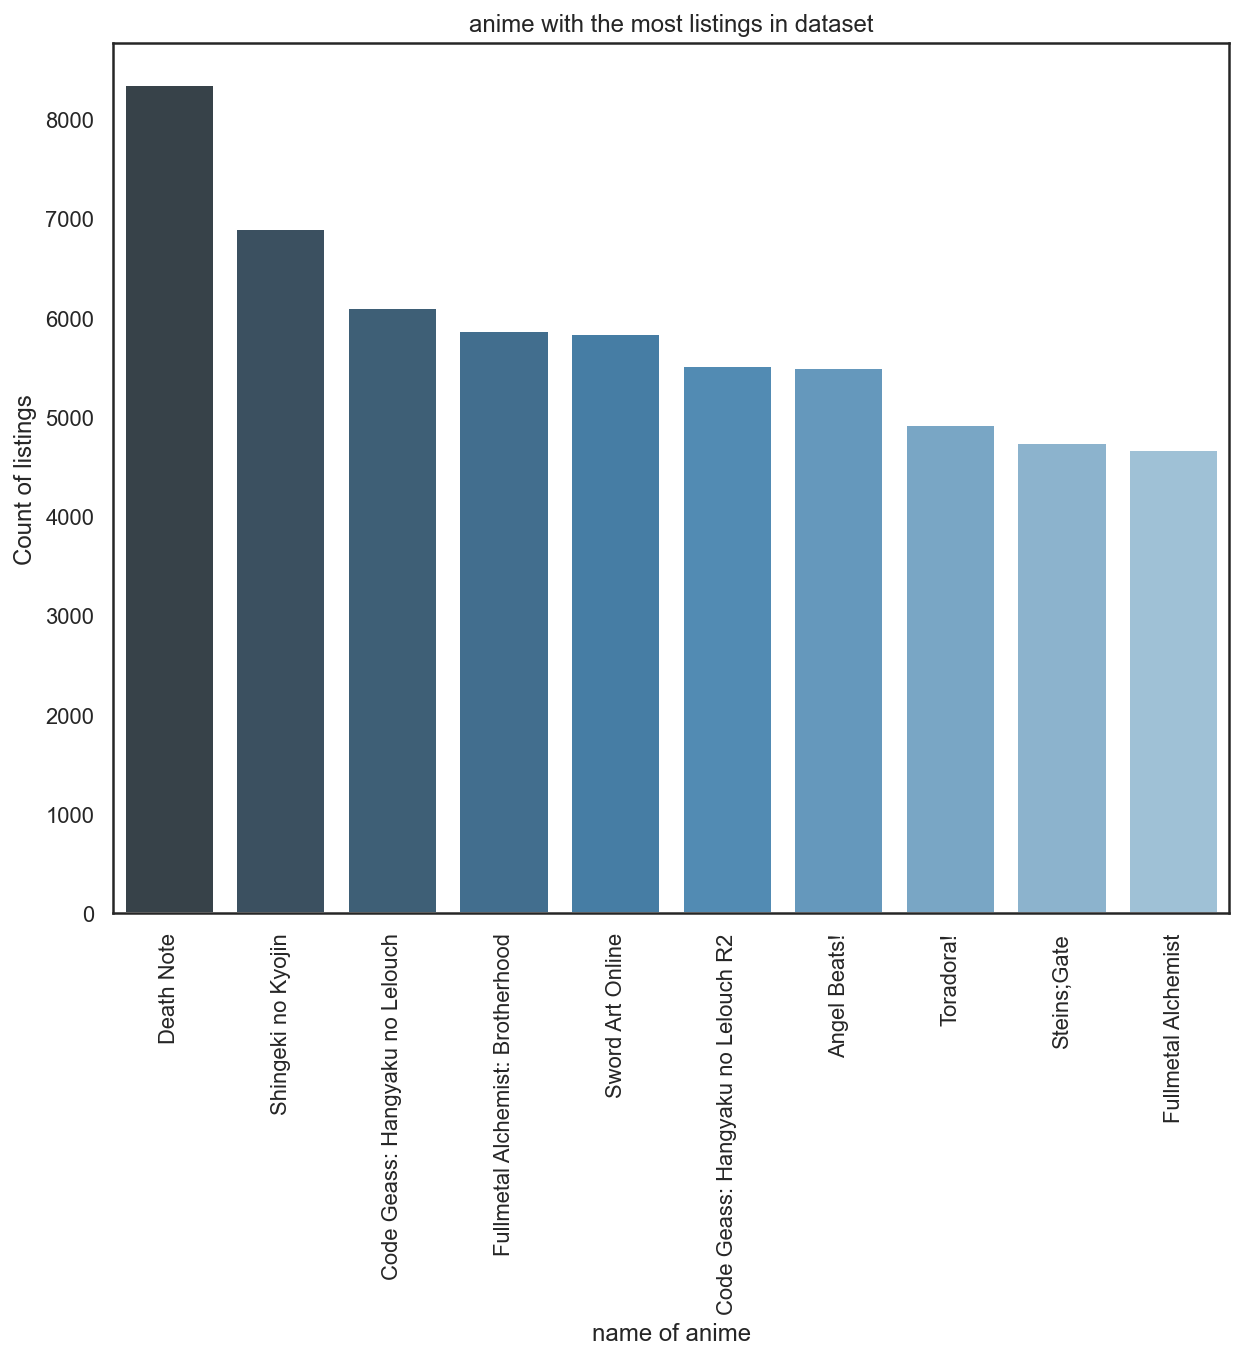

In [42]:
sns.set(rc={'figure.figsize':(10,8)})
sns.set_style('white')
viz_1=sns.barplot(x="name", y="A_Count", data=top_anime_df,
                 palette='Blues_d')
viz_1.set_title('anime with the most listings in dataset')
viz_1.set_ylabel('Count of listings')
viz_1.set_xlabel('name of anime')
viz_1.set_xticklabels(viz_1.get_xticklabels(), rotation=90)

[Text(0, 0, 'Mystery, Police, Psychological, Supernatural, Thriller'),
 Text(0, 0, 'Comedy, School, Slice of Life'),
 Text(0, 0, 'Comedy, Romance, School, Slice of Life'),
 Text(0, 0, 'Action, Adventure, Fantasy, Game, Romance'),
 Text(0, 0, 'Sci-Fi, Thriller'),
 Text(0, 0, 'Action, Drama, Fantasy, Shounen, Super Power'),
 Text(0, 0, 'Comedy, School, Shounen, Sports'),
 Text(0, 0, 'Comedy, Slice of Life'),
 Text(0, 0, 'Comedy, Drama, Romance, School, Slice of Life, Supernatural'),
 Text(0, 0, 'Comedy, School, Shounen, Slice of Life'),
 Text(0, 0, 'Action, Mecha, Sci-Fi')]

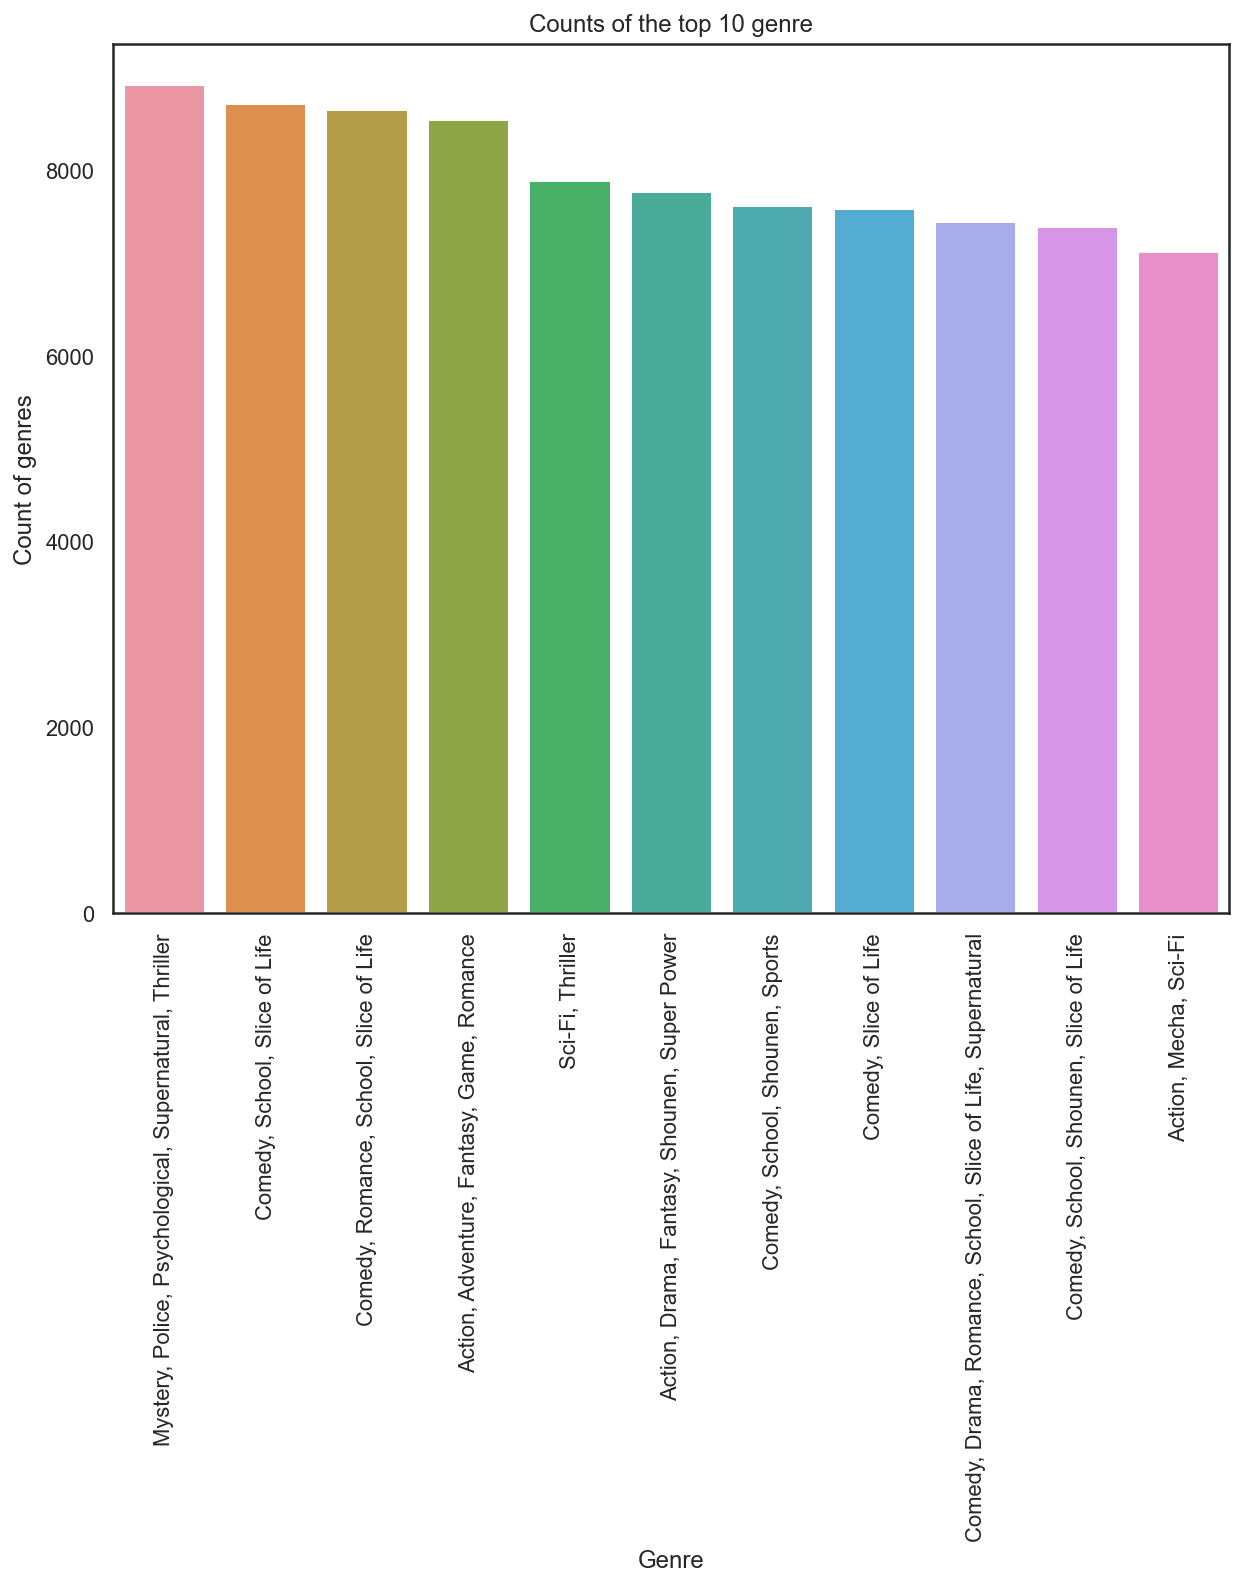

In [43]:
all_genre = [i for i in mergedata["genre"]]

from collections import Counter

_top_10_genre=Counter(all_genre).most_common()
_top_10_genre=_top_10_genre[0:11]
sub_w=pd.DataFrame(_top_10_genre)
sub_w.rename(columns={0:'Genre', 1:'Count'}, inplace=True)

viz_2=sns.barplot(x='Genre', y='Count', data=sub_w)
viz_2.set_title('Counts of the top 10 genre')
viz_2.set_ylabel('Count of genres')
viz_2.set_xlabel('Genre')
viz_2.set_xticklabels(viz_2.get_xticklabels(), rotation=90)

In [44]:
#label　encoding
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
mergedata['genre'] = le.fit_transform(mergedata['genre'])
mergedata['type'] = le.fit_transform(mergedata['type'])
mergedata['name'] = le.fit_transform(mergedata['name'])
mergedata.head()

,anime_id,name,genre,type,episodes,rating,members,user_id,userRating,mean_rating,cluster
0,32281,3516,2335,0,1,9.37,200630,152,10,7.699301,9
1,5114,1919,146,5,64,9.26,793665,152,9,7.699301,9
2,9253,6592,2782,5,24,9.17,673572,152,9,7.699301,9
3,4181,1101,2164,5,24,9.06,456749,152,9,7.699301,9
4,2904,1130,682,5,25,8.98,572888,152,8,7.699301,9


In [45]:
mergedata["episodes"] = mergedata["episodes"].astype(int)

In [46]:
mergedata["ratingbyc"] = mergedata.groupby("cluster")["rating"].mean()
mergedata["membersbyc"] = mergedata.groupby("cluster")["members"].mean()
mergedata["episodesbyc"] = mergedata.groupby("cluster")["episodes"].mean()



# Predicting rating by lightgbm

In [47]:
from sklearn.model_selection import train_test_split
import lightgbm as lgb


X_train ,X_test ,y_train ,y_test = train_test_split(mergedata[["members", "userRating", "mean_rating", "cluster", "name", "genre", "episodes","membersbyc", "episodesbyc"]]  ,mergedata["rating"] ,test_size=0.2 ,random_state = 20)
print(X_train.shape, X_test.shape)

(905350, 9) (226338, 9)


In [48]:
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint as sp_randint
from scipy.stats import uniform as sp_uniform

fit_params={"early_stopping_rounds":30, 
            "eval_metric" : 'rmse', 
            "eval_set" : [(X_test ,y_test)],
            'eval_names': ['valid'],
            'verbose': 100,
            'categorical_feature': 'auto'}

param_test ={'num_leaves': sp_randint(6, 50), 
             'min_child_samples': sp_randint(100, 500), 
             'min_child_weight': [1e-5, 1e-3, 1e-2, 1e-1, 1, 1e1, 1e2, 1e3, 1e4],
             'subsample': sp_uniform(loc=0.2, scale=0.8), 
             'colsample_bytree': sp_uniform(loc=0.4, scale=0.6),
             'reg_alpha': [0, 1e-1, 1, 2, 5, 7, 10, 50, 100],
             'reg_lambda': [0, 1e-1, 1, 5, 10, 20, 50, 100]}

In [49]:
clf = lgb.LGBMRegressor(max_depth=-1, random_state=314, silent=True, metric='None', n_estimators=2500)
gs = RandomizedSearchCV(
    estimator=clf, param_distributions=param_test, 
    n_iter=100,
    scoring='neg_root_mean_squared_error',
    cv=5,
    refit=True,
    random_state=314,
    verbose=True)

In [50]:
gs.fit(X_train, y_train , **fit_params)
print('Best score reached: {} with params: {} '.format(gs.best_score_, gs.best_params_))

Fitting 5 folds for each of 100 candidates, totalling 500 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


Training until validation scores don't improve for 30 rounds
[100]	valid's rmse: 0.262286
[200]	valid's rmse: 0.220072
[300]	valid's rmse: 0.196703
[400]	valid's rmse: 0.179225
[500]	valid's rmse: 0.166381
[600]	valid's rmse: 0.156696
[700]	valid's rmse: 0.147856
[800]	valid's rmse: 0.141593
[900]	valid's rmse: 0.135285
[1000]	valid's rmse: 0.130055
[1100]	valid's rmse: 0.125825
[1200]	valid's rmse: 0.12163
[1300]	valid's rmse: 0.117991
[1400]	valid's rmse: 0.114568
[1500]	valid's rmse: 0.111499
[1600]	valid's rmse: 0.108602
[1700]	valid's rmse: 0.105912
[1800]	valid's rmse: 0.103526
[1900]	valid's rmse: 0.101187
[2000]	valid's rmse: 0.0992626
[2100]	valid's rmse: 0.0973771
[2200]	valid's rmse: 0.09535
[2300]	valid's rmse: 0.0936122
[2400]	valid's rmse: 0.09182
[2500]	valid's rmse: 0.0901203
Did not meet early stopping. Best iteration is:
[2500]	valid's rmse: 0.0901203
Training until validation scores don't improve for 30 rounds
[100]	valid's rmse: 0.262119
[200]	valid's rmse: 0.22231


[Parallel(n_jobs=1)]: Done 500 out of 500 | elapsed: 209.2min finished


Training until validation scores don't improve for 30 rounds
[100]	valid's rmse: 0.222378
[200]	valid's rmse: 0.181661
[300]	valid's rmse: 0.157986
[400]	valid's rmse: 0.141396
[500]	valid's rmse: 0.130317
[600]	valid's rmse: 0.121542
[700]	valid's rmse: 0.113463
[800]	valid's rmse: 0.105868
[900]	valid's rmse: 0.100006
[1000]	valid's rmse: 0.0956074
[1100]	valid's rmse: 0.0911009
[1200]	valid's rmse: 0.0873679
[1300]	valid's rmse: 0.0844949
[1400]	valid's rmse: 0.0819744
[1500]	valid's rmse: 0.0796985
[1600]	valid's rmse: 0.077688
[1700]	valid's rmse: 0.0756973
[1800]	valid's rmse: 0.0741173
[1900]	valid's rmse: 0.0724471
[2000]	valid's rmse: 0.0709519
[2100]	valid's rmse: 0.0694094
[2200]	valid's rmse: 0.0681152
[2300]	valid's rmse: 0.0668782
[2400]	valid's rmse: 0.066004
[2500]	valid's rmse: 0.0649198
Did not meet early stopping. Best iteration is:
[2500]	valid's rmse: 0.0649198
Best score reached: -0.0676539036464818 with params: {'colsample_bytree': 0.8665631328558623, 'min_child_

In [54]:
gs.best_estimator_

LGBMRegressor(colsample_bytree=0.8665631328558623, metric='None',
              min_child_samples=122, min_child_weight=0.1, n_estimators=2500,
              num_leaves=48, random_state=314, reg_alpha=2, reg_lambda=50,
              subsample=0.7252600946741159)

In [55]:
pred = gs.predict(X_test)

In [57]:
#error check 
sum(np.sqrt((y_test-pred)**2))/len(pred)

0.02298201036658383